## Assignment #1

- **Release date**: 2025-09-30 (Tue)
- **Due date**: 2025-10-14 (Tue) 23:59 (no late submissions accepted)
- **Weighting**: 5% of the final grade
- **Submission format**: a Jupyter notebook (.ipynb) that runs on Colab or a local Jupyter environment. Please include both problem statements and your solutions.



### 1. Broadcasting: rotation matrix multiplication (5pts)

Given the vectors/matrix below:
```python
import numpy as np

x = np.array([[2, 0]])
rotation = np.array([[0, -1],
                     [1,  0]])
```
1. Compute `rotation * x`. Explain how the broadcasting mechanism works in this case.  
2. Compute `x * rotation`. Explain why the results of (1) and (2) are the same or different.


In [10]:
# Q1.
import numpy as np

x = np.array([[2, 0]])
rotation = np.array([[0, -1],
                     [1,  0]])

print(f"rotation * x = {rotation * x}")
print(f"x * rotation = {x * rotation}")

rotation * x = [[0 0]
 [2 0]]
x * rotation = [[0 0]
 [2 0]]


numpy supports broadcasting for operation between different size of arrays.
In these cases, `x`(2,1) and `rotation`(2,2) have same number of columns. Therefore, numpy automatically converts(broadcasts) `x` to `[2,0],[2,0]`.
By broadcasting, the operations are equal to `([2,0],[2,0]) * ([0,-1],[1,0])` or `([0,-1],[1,0]) * ([2,0],[2,0])` which is element-wise operation.
Regardless of order of terms, the result should be same for these situations.

### 2. Column-major vectorization (5pts)

Suppose you have the following 2D tensor (matrix):
```python
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
```
Write NumPy code to rearrange its values into a 1D tensor (vector) in **column-major order**.


In [11]:
# Q2.
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

x_fortran = np.reshape(x, (1,12), order="F")
print(x_fortran)

[[ 1  5  9  2  6 10  3  7 11  4  8 12]]


### 3. Transpose using only `reshape` (5pts)

Using only NumPy’s `reshape` function, compute the transpose of matrix `x` from the previous problem (without calling `x.T`).


In [12]:
print(x_fortran.reshape(4,3))

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


### 4. Vector arithmetic (5pts)

Given the vector of primes:
```python
primes = np.array([2, 3, 5, 7, 11, 13])
```
Create a vector `primes_squared_minus_one` where the \(i\)th element is the square of the \(i\)th prime minus 1. For example, the second element of `primes_squared_minus_one` would be equal to `3^2 - 1 = 8`. Use vectorized operations (no `for` loops).


In [13]:
primes = np.array([2, 3, 5, 7, 11, 13])
primes_squared_minus_one = primes**2 - 1

print(primes_squared_minus_one)

[  3   8  24  48 120 168]


### 5. Elementwise multiplication benchmark (15pts)

Create two random matrices of increasing sizes and compare the wall‑clock time required to compute their elementwise product using:

1. A naive Python implementation (nested `for` loops).  
2. NumPy’s vectorized multiplication `x * y`.

Extend the experiment by comparing `float32` and `float64` dtypes. For matrix sizes `[100, 500, 1000, 2000]`, measure and plot the elapsed time (seconds) for each method and dtype. Discuss why vectorization and data types affect performance.


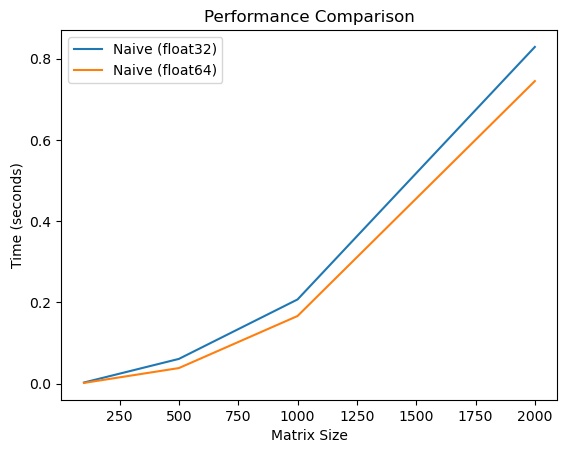

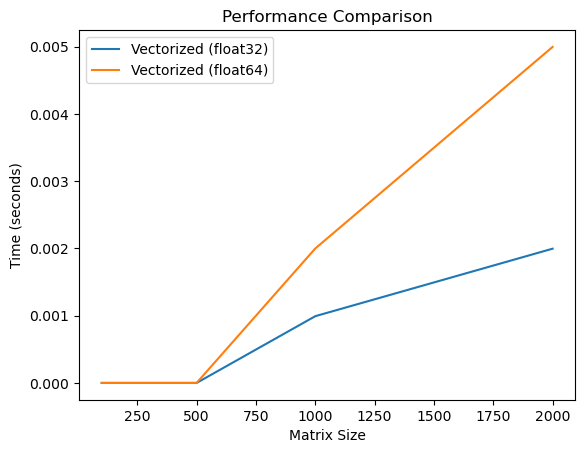

In [14]:
import time
import matplotlib.pyplot as plt


def naive_operation(x, y):
  row = x.shape[0]
  col = x.shape[1]
  result = np.zeros(shape=(row, col))
  for r in range(row):
    for c in range(col):
      result[r,c] = x[r,c] * y[r,c]
  return result

matrix_sizes = [100, 500, 1000, 2000]

def benchmark(dtype):
  naive_times = []
  vectorized_times = []
  for size in matrix_sizes:
    x = np.random.rand(size, size).astype(dtype)
    y = np.random.rand(size, size).astype(dtype)

    start = time.time()
    naive = naive_operation(x, y)
    end = time.time()
    naive_times.append(end - start)

    start = time.time()
    vectorized = x * y
    end = time.time()
    vectorized_times.append(end - start)
  return naive_times, vectorized_times

naive_f32, vectorized_f32 = benchmark(np.float32)
naive_f64, vectorized_f64 = benchmark(np.float64)

plt.plot(matrix_sizes, naive_f32, label='Naive (float32)')
plt.plot(matrix_sizes, naive_f64, label='Naive (float64)')

plt.xlabel("Matrix Size")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison")
plt.legend()
plt.show()

plt.plot(matrix_sizes, vectorized_f32, label='Vectorized (float32)')
plt.plot(matrix_sizes, vectorized_f64, label='Vectorized (float64)')

plt.xlabel("Matrix Size")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison")
plt.legend()
plt.show()

Vectorization operations internally process multiple elements in parallel using C-based loops and SIMD instructions, which are much faster than Python iterative methods.
In both methods, as the matrix size increases, the operation time increases, but the vectorization method has a very small increase because there is no Python interpreter overhead. It follows both of the time complexity O(N^2), but the difference in coefficients is large.

Since Python basically uses float64 as the default, the operation of float64 in the naive operation was faster, but the vectorization operation produced the opposite result. Although the time required for vectorization operation is absolutely very small, it can be seen that float32 operation is faster than float64, which can be estimated to have been more advantageous for cache and memory access due to the small data type itself.

### 6. Manual two‑layer neural network and backpropagation (30pts)

Implement a simple fully connected neural network with one hidden layer using **NumPy** (do not use high‑level libraries like TensorFlow or PyTorch). The network should:

- Take an input vector of dimension 2.
- Have one hidden layer with 3 units and ReLU activation.
- Produce a single output (regression) with linear activation.

Tasks:

1. Write a function to perform the forward pass given weights and biases.
2. Compute the mean squared error (MSE) loss for a single training example \((x, y)\).
3. Derive and implement the backward pass (compute gradients of the loss with respect to each weight and bias) using the chain rule.
4. Test your implementation on a synthetic sample `x = np.array([1.0, -2.0])`, `y = 3.0` with random initial weights and biases.

Provide your code and include a brief explanation of each step as comments within the code.


In [15]:
np.random.seed(0)

"""
neural network implementation
"""
x = np.array([1.0, -2.0])
y = 3.0

# 1st weights & bias
w1 = np.random.rand(2,3)  # [1,2] dot [2,3] = [1,3]
b1 = np.random.rand(1,3)  # [1,3] + [1,3]
print(f"w1: {w1}")
print(f"b1: {b1}")

# 2nd weights & bias
w2 = np.random.rand(3,1)  # [1,3] dot [3,1] = [1,1]
b2 = np.random.rand(1,1)  # [1,1] + [1,1]
print(f"w2: {w2}")
print(f"b2: {b2}")

"""
forward pass
"""
def forward_pass(x, w1, b1, w2, b2):
  h = np.dot(x, w1) + b1          # hidden layer: linear transformation
  relu = np.maximum(h, 0)         # hidden layer: ReLU(x)
  y_pred = np.dot(relu, w2) + b2  # output layer
  print(f"Predicted value: {y_pred}")
  return h, relu, y_pred

h, relu, y_pred = forward_pass(x, w1, b1, w2, b2)

"""
MSE
"""
mse = ((y - y_pred) ** 2) * 0.5
print(f"MSE: {mse}")

"""
backward pass with chain rule
-> derivative can be replaced by dot product of transpose
"""
dL_dy = y_pred - y # [1,1]

dL_dw2 = np.dot(relu.T, dL_dy)  # [3,1] dot [1,1]
dL_db2 = dL_dy                  # [1,1]

dL_drelu = np.dot(dL_dy, w2.T)  # [1,1] dot [1,3]
dL_dh = dL_drelu * (h > 0)      # [1,3]

dL_dw1 = np.dot(x.reshape(2,1), dL_dh)  # [2,1] dot [1,3]
dL_db1 = dL_dh                          # [1,3]

print("\nGradients:")
print("dL/dw2 =\n", dL_dw2)
print("dL/db2 =\n", dL_db2)
print("dL/dw1 =\n", dL_dw1)
print("dL/db1 =\n", dL_db1)


w1: [[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]]
b1: [[0.43758721 0.891773   0.96366276]]
w2: [[0.38344152]
 [0.79172504]
 [0.52889492]]
b2: [[0.56804456]]
Predicted value: [[1.31473527]]
MSE: [[1.4200586]]

Gradients:
dL/dw2 =
 [[ 0.        ]
 [-1.28021601]
 [-0.46283758]]
dL/db2 =
 [[-1.68526473]]
dL/dw1 =
 [[-0.         -1.33426628 -0.89132795]
 [ 0.          2.66853256  1.7826559 ]]
dL/db1 =
 [[-0.         -1.33426628 -0.89132795]]


### 7. MNIST MLP hyperparameter exploration (20pts)

In class we trained an MLP on the MNIST dataset. To explore how architecture choices affect performance using **PyTorch**, train three MLP models with hidden layer sizes \(h \in \{64, 256, 1024\}\).  
For each model:

1. Flatten the 28×28 input images into a 784‑dimensional vector.
2. Use a single hidden layer with \(h\) units and ReLU activation.
3. Use a 10‑unit linear layer for the outputs (PyTorch’s `nn.CrossEntropyLoss` expects logits).
4. Train for 5 epochs with batch size 128 using the RMSprop optimizer.
5. Record training and validation accuracy at each epoch.

Plot the training/validation accuracy curves for each hidden size on the same chart and discuss any trends you observe (e.g., underfitting vs overfitting). Also report the final test accuracy for each model.

Using device: cuda


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.01MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 139kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]



hidden layer size: 64
Epoch 1/5 | Train Acc: 0.9218 | Val Acc: 0.9209
Epoch 2/5 | Train Acc: 0.9417 | Val Acc: 0.9365
Epoch 3/5 | Train Acc: 0.9532 | Val Acc: 0.9456
Epoch 4/5 | Train Acc: 0.9613 | Val Acc: 0.9508
Epoch 5/5 | Train Acc: 0.9672 | Val Acc: 0.9560
Final Test Accuracy (h=64): 0.9597

hidden layer size: 256
Epoch 1/5 | Train Acc: 0.9505 | Val Acc: 0.9471
Epoch 2/5 | Train Acc: 0.9686 | Val Acc: 0.9623
Epoch 3/5 | Train Acc: 0.9774 | Val Acc: 0.9673
Epoch 4/5 | Train Acc: 0.9833 | Val Acc: 0.9717
Epoch 5/5 | Train Acc: 0.9882 | Val Acc: 0.9752
Final Test Accuracy (h=256): 0.9751

hidden layer size: 1024
Epoch 1/5 | Train Acc: 0.9658 | Val Acc: 0.9592
Epoch 2/5 | Train Acc: 0.9818 | Val Acc: 0.9722
Epoch 3/5 | Train Acc: 0.9888 | Val Acc: 0.9751
Epoch 4/5 | Train Acc: 0.9911 | Val Acc: 0.9760
Epoch 5/5 | Train Acc: 0.9942 | Val Acc: 0.9777
Final Test Accuracy (h=1024): 0.9796


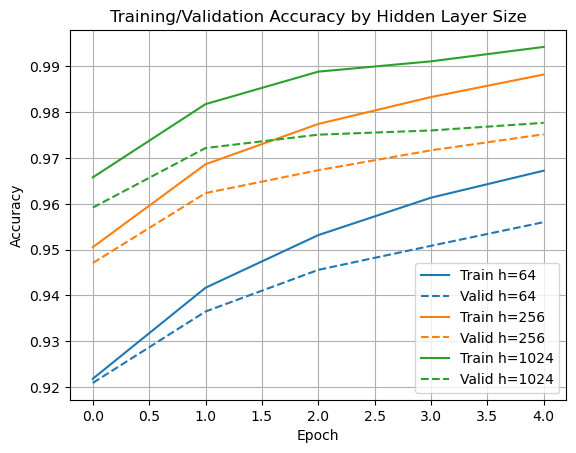

In [16]:
import torch
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 1. Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

torch.manual_seed(0)

# 2. Load dataset
train_data = datasets.MNIST(root='./data', train=True, download=True)
test_data = datasets.MNIST(root='./data', train=False, download=True)

train_images, train_labels = train_data.data, train_data.targets
test_images, test_labels = test_data.data, test_data.targets

train_images_flat = train_images.reshape((60000, 28*28)).float() / 255.0
test_images_flat = test_images.reshape((10000, 28*28)).float() / 255.0

# 3. Dataset / Dataloader
class ImageDataset(Dataset):
  def __init__(self, X, y):
    self.features = X
    self.labels = y

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

  def __len__(self):
    return len(self.labels)

train_ds = ImageDataset(train_images_flat, train_labels)
test_ds = ImageDataset(test_images_flat, test_labels)
train_len = int(0.8 * len(train_ds))
valid_len = len(train_ds) - train_len
train_ds, valid_ds = random_split(train_ds, [train_len, valid_len])

train_loader = DataLoader(dataset=train_ds, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=128, shuffle=False)
test_loader = DataLoader(dataset=test_ds, batch_size=128, shuffle=False)

# 4. Define model
class NeuralNetwork(torch.nn.Module):
  def __init__(self, h):
    super().__init__()
    self.layer = torch.nn.Sequential(
        torch.nn.Linear(28*28, h),
        torch.nn.ReLU(),
        torch.nn.Linear(h, 10)
    )

  def forward(self, x):
    return self.layer(x)

# 5. Accuracy setup
def compute_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in dataloader:
            features, labels = features.to(device), labels.to(device)
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
    return correct / total

# 6. Training setup
def model_training(model, optimizer, num_epochs, train_loader, valid_loader, device):
  train_acc_list = []
  valid_acc_list = []

  for epoch in range(num_epochs):
    model.train()
    for features, labels in train_loader:
      features, labels = features.to(device), labels.to(device)
      logits = model(features)
      loss = F.cross_entropy(logits, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    train_acc = compute_accuracy(model, train_loader, device)
    valid_acc = compute_accuracy(model, valid_loader, device)
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Acc: {train_acc:.4f} | Val Acc: {valid_acc:.4f}")

  return train_acc_list, valid_acc_list

# 7. Training models
layer_sizes = [64, 256, 1024]
num_epochs = 5

all_train_acc = []
all_valid_acc = []
final_test_acc = []

for size in layer_sizes:
  print(f"\nhidden layer size: {size}")
  model = NeuralNetwork(size).to(device)
  optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
  train_acc, valid_acc = model_training(model, optimizer, num_epochs, train_loader, valid_loader, device)

  all_train_acc.append(train_acc)
  all_valid_acc.append(valid_acc)

  test_acc = compute_accuracy(model, test_loader, device)
  final_test_acc.append(test_acc)
  print(f"Final Test Accuracy (h={size}): {test_acc:.4f}")

# 8. Plot
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, size in enumerate(layer_sizes):
  plt.plot(all_train_acc[i], color=colors[i], linestyle='-', label=f"Train h={size}")
  plt.plot(all_valid_acc[i], color=colors[i], linestyle='--', label=f"Valid h={size}")

plt.title("Training/Validation Accuracy by Hidden Layer Size")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Larger layer size can make model more accurate. The final test results of each model prove it.
Overall, validation accuracy is smaller than training accuracy.
Each time the epoch is progressed, the difference between training accuracy and validation accuracy becomes larger.
Also, the size of the gap seems to be larger as the size of the layer is larger.
The h=64 model probably suffers from underfitting. It shows relatively low overall accuracy compared to the other two models.
Conversely, the h=1024 model shows very high accuracy, but the gap between the validation accuracy and the training accuracy is very large, which poses a risk of overfitting.
Among the current three models, the h=256 model is found to be the most balanced.

### 8. Optimizer and hyperparameter experiment (15pts)

Choose one of the models from Question 7 (e.g., hidden size 256) and experiment with two different learning rates for the optimizer (e.g., 0.01 and 0.0001) using PyTorch. Train each model for 5 epochs and compare their training/validation accuracy curves. Discuss how the learning rate affects convergence speed and final accuracy.



Learning Rate: 0.01
Epoch 1/5 | Train Acc: 0.9571 | Val Acc: 0.9497
Epoch 2/5 | Train Acc: 0.9649 | Val Acc: 0.9540
Epoch 3/5 | Train Acc: 0.9673 | Val Acc: 0.9535
Epoch 4/5 | Train Acc: 0.9818 | Val Acc: 0.9674
Epoch 5/5 | Train Acc: 0.9849 | Val Acc: 0.9712
Final Test Accuracy (lr=0.01): 0.9685

Learning Rate: 0.0001
Epoch 1/5 | Train Acc: 0.8878 | Val Acc: 0.8847
Epoch 2/5 | Train Acc: 0.9065 | Val Acc: 0.9053
Epoch 3/5 | Train Acc: 0.9164 | Val Acc: 0.9147
Epoch 4/5 | Train Acc: 0.9236 | Val Acc: 0.9225
Epoch 5/5 | Train Acc: 0.9297 | Val Acc: 0.9292
Final Test Accuracy (lr=0.0001): 0.9293


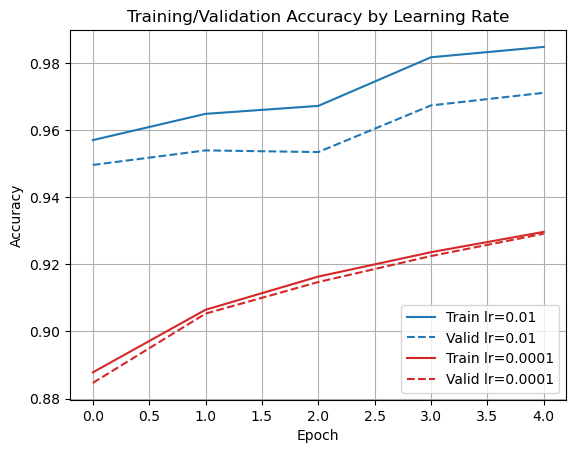

In [17]:
# 1. Training
lr_cases = [0.01, 0.0001]
all_train_acc = []
all_valid_acc = []
final_test_acc = []

for lr in lr_cases:
  print(f"\nLearning Rate: {lr}")
  model = NeuralNetwork(256).to(device)
  optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
  train_acc, valid_acc = model_training(model, optimizer, num_epochs, train_loader, valid_loader, device)

  all_train_acc.append(train_acc)
  all_valid_acc.append(valid_acc)

  test_acc = compute_accuracy(model, test_loader, device)
  final_test_acc.append(test_acc)
  print(f"Final Test Accuracy (lr={lr}): {test_acc:.4f}")

# 2. Plot
colors = ['tab:blue', 'tab:red']

for i, lr in enumerate(lr_cases):
  plt.plot(all_train_acc[i], color=colors[i], linestyle='-', label=f"Train lr={lr}")
  plt.plot(all_valid_acc[i], color=colors[i], linestyle='--', label=f"Valid lr={lr}")

plt.title("Training/Validation Accuracy by Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

The higher the learning rate, the larger the width (in units) of updating the weights, so basically it has a faster convergence rate. Conversely, a lower learning rate lags somewhat in the convergence rate because the absolute amount of weights being updated is small.
Basically, I think that the learning rate and the final accuracy are in a trade-off relationship. If the learning rate is low so that more sophisticated weight updates are possible, it would be slow but more accurate. However, the results of this experiment did not meet these expectations, because the epoch in that experiment was only 5. Of course, it is encouraging to achieve an accuracy of over 90% in 5 epochs alone, but it is absolutely low compared to the number of data, so in the case of a slow learning rate of 0.0001, the accuracy is lower than expected.
This allows us to remind ourselves once again that we need to flexibly adjust our learning rates not only according to the learning data, but also according to the learning environment.
For example, if we need to learn real-time data from mobile devices, we can take the learning rate high and learn new data quickly and with less resources. However, in an environment with a lot of computing resources and enough time, we should focus on lower learning rates to achieve higher accuracy.